In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#set up a base to use
Base = automap_base()

# use the base to reflect the database
Base.prepare(engine, reflect=True)

In [6]:
# check the keys to find the tables availible 
Base.classes.keys()

['measurement', 'station']

In [7]:
# store the tables inside a variable
measurement = Base.classes.measurement
station = Base.classes.station

In [15]:
# find the names of the attributes that need to be examined
# "tobs" is "temperature observations"
# "prcp" is "precipitation score"

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# start a session to begin exploratory analysis
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Goal: retrieve the last 12 months of precipitation data and plot the results 

# find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [20]:
# find the date a year ago using datetime
# date requires integers so observe the result from last date and manually input
start_date = dt.date(2017,8,23) - dt.timedelta(days=365)
start_date

datetime.date(2016, 8, 23)

In [21]:
# use the first date to retrieve the query on precipitation for a year
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).\
    order_by(measurement.date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=["Date","Precipitation"])
# setting it to index will s     ort the dataframe by date
precipitation_df.set_index("Date", inplace=True)
precipitation_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


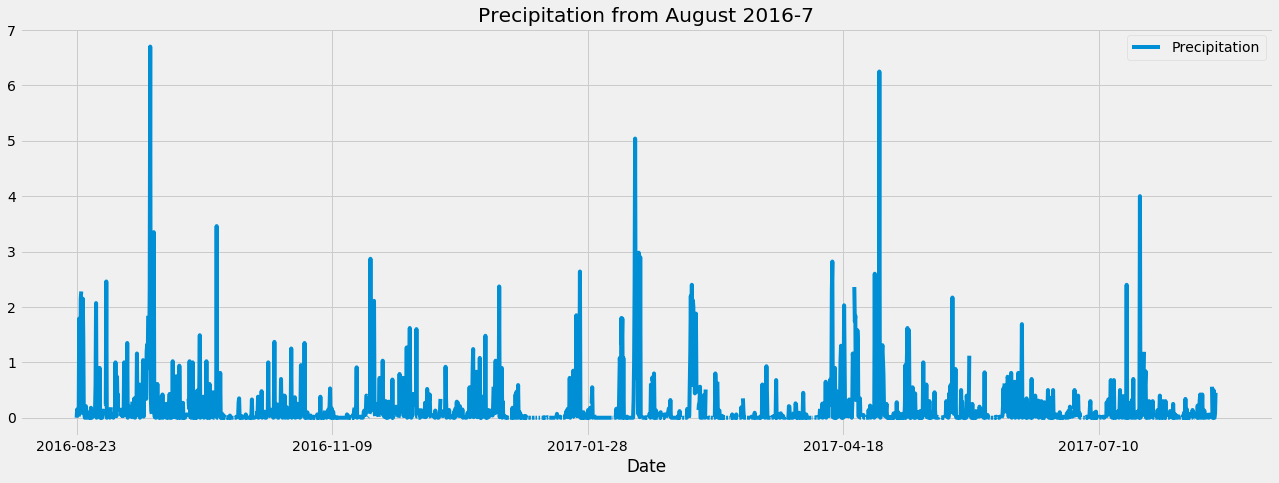

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation from August 2016-7", figsize=(20,7))
plt.savefig("Images/precipitation.png")
plt.show()


In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
# this can be done with individual methods or with describe
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Perform a query to retrieve all data and precipitation scores
all_precipitation = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
all_precipitation

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(measurement.station).distinct().count()
total_stations

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all() # List the stations and the counts in descending order.

# isolate the list return to get the id of the most active station of the data
# since the list is sorted; the first one in the list will be the highest
most_active_station = most_active_stations[0][0]
most_active_station

'USC00519281'

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

summary_statistics_temp = session.query(*sel).\
    filter(measurement.station == most_active_station).all()
summary_statistics_temp

[(54.0, 85.0, 71.66378066378067)]

In [40]:
# Using the most active station id query the last 12 months of temperature observation data for this station
tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= start_date).\
    filter(measurement.station == most_active_station).\
    order_by(measurement.date).all()

# Save the Query Results as a Pandas DataFrame
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

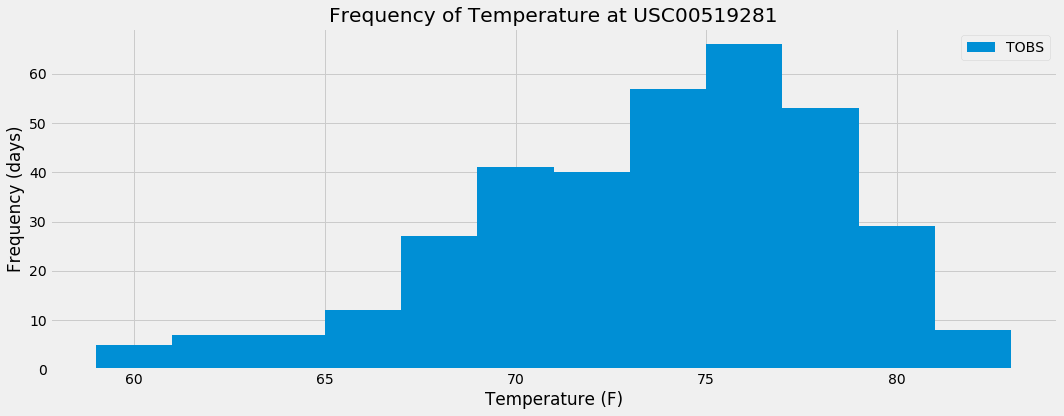

In [44]:
# plot the results as a histogram
# make bins 12 for eaceh month
tobs_data_df.plot.hist(bins=12, title=f"Frequency of Temperature at {most_active_station}", figsize=(15,6))
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency (days)")
plt.tight_layout()
plt.savefig("Images/frequency_of_temperature.png")
plt.show()

# Close session

In [45]:
# Close Session
session.close()